# Đề thi Cuối kỳ Hệ khuyến nghị 2025.

### Khoa học dữ liệu IUH. Thời gian làm bài: 90 phút.

### NGÔ HỒNG THÔNG
### MSSV: 22649011

**Bài 1.** (*1.0 điểm*) Trong BA chọn HAI.
1. Khi sử dụng khuyến nghị bằng knowledge-based, nếu tập kết quả trả về là rỗng hoặc quá lớn thì cần điều chỉnh các attribute thế nào?
2. Khi khuyến nghị nhóm, có hai cách căn bản để tính rating đại diện của nhóm là gì?
3. Tại sao Netflix hay các hệ khuyến nghị lớn không sử dụng riêng content-based filtering hay collaborative filtering?

#### **1. Knowledge-based Recommendation: Điều chỉnh attribute khi kết quả rỗng hoặc quá lớn**

##### **(a) Khi tập kết quả rỗng**
Các ràng buộc quá chặt → cần nới lỏng:

* Nới rộng miền giá trị của thuộc tính

  * Ví dụ: giá từ 5–7 triệu → 5–8 triệu
* Giảm số lượng thuộc tính bắt buộc
* Chuyển **hard constraints** → **soft constraints**
* Giảm trọng số (weight) của các thuộc tính ít quan trọng

##### **(b) Khi tập kết quả quá lớn**

Các ràng buộc quá lỏng → cần siết chặt:
* Thêm thuộc tính lọc mới
* Thu hẹp miền giá trị

  * Ví dụ: 5–15 triệu → 7–10 triệu
* Tăng độ khắt khe của các thuộc tính quan trọng
* Tăng trọng số (weight) để xếp hạng theo độ quan trọng


#### **2. Hai cách cơ bản để tính rating đại diện cho nhóm**

##### **(1) Trung bình (Average Aggregation)**

* Mỗi thành viên có trọng số bằng nhau
* Dễ tính và công bằng, nhưng có thể che lấp trường hợp 1 người rất không thích item đó


##### **(2) Ít khổ sở nhất (Least Misery)**
* Bảo vệ người “khó tính nhất”
* Tránh trường hợp item khiến một thành viên cực kỳ không hài lòng
* Nhưng có thể loại bỏ nhiều lựa chọn thú vị


#### **3. Vì sao Netflix và hệ lớn không dùng riêng Content-based hay Collaborative Filtering?**

##### **(a) Hạn chế của Content-based Filtering**
* Phụ thuộc quá nhiều vào metadata nội dung
* Gây hiệu ứng “overspecialization” → chỉ gợi ý thứ giống cái bạn đã xem
* Không tận dụng được hành vi cộng đồng
* Khó mô tả các đặc trưng trừu tượng của phim


##### **(b) Hạn chế của Collaborative Filtering**
* Cold-start cho user mới và item mới
* Ma trận rating rất thưa (sparsity)
* Không hiệu quả khi scale cực lớn nếu dùng CF truyền thống
* Dễ bị bias, shilling attack


##### **(c) Vì vậy phải dùng mô hình lai (Hybrid)**
* Kết hợp CBF + CF để bù điểm yếu cho nhau
* Giải quyết cold-start tốt hơn
* Tăng đa dạng, bất ngờ và chất lượng gợi ý
* Tối ưu nhiều mục tiêu: retention, thời lượng xem, cân bằng nội dung…


**Bài 2.** (*2 điểm*) Để đánh giá cho hệ khuyến nghị sử dụng thang đo **Recall** or **Precision**, ta cần phải chuẩn hoá thang 1-5 của rating về dạng nhị phân, trong đó ta quy ước: 1 = relevant (có quan tâm) và 0 = irrelevant (không quan tâm) thông qua ranh giới threshold (ở đây ta lấy 3.5), cụ thể:
- Relevant: True Rating > = $3.5$.
- Irrelevant: True Rating < $3.5$.
- Recommended item: Predicted Rating >= $3.5$.
- Not Recommended item: Predicted Rating < $3.5$.

Ta đặt $tp$ = true positive, $fp$ = false postive, $fn$ = false negative, $fp$ = false positive. Ví dụ: nếu thực tế là relevant và khuyến nghị cũng relevant thì true positive, còn thực tế là relevant mà khuyến nghị ra irrelavant thì false negative. Nhắc lại công thức 

$precision = tp / (tp + fp)$ và $recall = tp / (tp + fn)$ và $F1-score = 2*precision*recall / (precision + recall)$.

Ngoài ra, precisionAll sẽ được là tổng $tp$ theo tất cả các dòng chia cho tổng $(tp + fp)$ theo tất cả các dòng. Tương tự với recallAll và F1-scoreAll. 

Tiếp theo, để tính **RMSE**, ta tính căn bậc hai của average của bình phương sai số giữa giá trị dự đoán và giá trị thực tế.

Bây giờ cho ma trận *utility matrix* như sau, trong đó ở ô in đậm là testing rating, trong đó số bên phải là giá trị được dự đoán bởi mô hình, 
số bên trái là giá trị thực tế.

1. Hãy tính F-score của $U_1$, $U_2$, $U_3$ và của cả hệ thống.
2. Hãy tính RMSE của cả hệ thống.

|Rating     | $I_1$    | $I_2$  | $I_3$   |  $I_4$  | $I_5$ | $I_6$ |  
|----------|----------|--------|---------|---------| ---------|---------|
| $U_1$    | **5 - 4**     | **4 - 3**     | **4 - 5**    |   **3 - 5** | 1 | 5 | 
| $U_2$ | 3    | **5 - 4**      | 5     |   **5 - 3**    | **1 - 4** | **3 - 3**|
| $U_3$  | 3     | 4      |  **4 - 4**  |    **1 - 4** | **2 - 5** | **5 - 4**|

In [4]:
import math


threshold = 3.5   # >= 3.5 => relevant / recommended

# Dữ liệu testing: (True Rating, Predicted Rating)
data = {
    "U1": [(5, 4), (4, 3), (4, 5), (3, 5)], 
    "U2": [(5, 4), (5, 3), (1, 4), (3, 3)],
    "U3": [(4, 4), (1, 4), (2, 5), (5, 4)],
}

# HÀM PHÂN TÍCH CHI TIẾT CHO MỖI USER

def analyze_user(user, pairs):
    print(f" PHÂN TÍCH CHI TIẾT USER: {user}")
    print("Threshold = 3.5 (>= 3.5 → relevant / recommended)")

    tp = fp = fn = tn = 0
    sq_errors = []

    for idx, (true, pred) in enumerate(pairs, start=1):

        true_rel = true >= threshold
        rec = pred >= threshold

        # Xác định loại TP / FP / FN / TN
        if true_rel and rec:
            case = "TP (true positive)"
            tp += 1
        elif (not true_rel) and rec:
            case = "FP (false positive)"
            fp += 1
        elif true_rel and (not rec):
            case = "FN (false negative)"
            fn += 1
        else:
            case = "TN (true negative)"
            tn += 1

        # Sai số bình phương
        se = (pred - true)**2
        sq_errors.append(se)

        # IN CHI TIẾT TỪNG ITEM
        print(f"\nItem {idx}: True = {true}, Pred = {pred}")
        print(f"  → True relevant? {true_rel}")
        print(f"  → Recommended?   {rec}")
        print(f"  → Kết luận: {case}")
        print(f"  → Squared error = ({pred} - {true})² = {se}")

    # TÍNH TOÁN CHỈ SỐ

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall    = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1        = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0
    rmse      = math.sqrt(sum(sq_errors) / len(sq_errors))

    print(f"\n TỔNG KẾT USER {user}:")
    print(f"   TP = {tp}, FP = {fp}, FN = {fn}, TN = {tn}")

    print(f"\n   Precision = TP/(TP+FP) = {tp}/({tp}+{fp}) = {precision:.4f}")
    print(f"   Recall    = TP/(TP+FN) = {tp}/({tp}+{fn}) = {recall:.4f}")
    print(f"   F1-score  = {f1:.4f}")
    print(f"   RMSE_{user} = sqrt(mean squared error) = {rmse:.4f}")

    return {
        "tp": tp, "fp": fp, "fn": fn, "tn": tn,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "rmse": rmse,
        "sq_errors": sq_errors
    }

# GỌI HÀM PHÂN TÍCH TỪNG USER

results = {}
for user, ratings in data.items():
    results[user] = analyze_user(user, ratings)

# TÍNH CHỈ SỐ TOÀN HỆ THỐNG

print(" TÍNH CHỈ SỐ TOÀN HỆ THỐNG")
tp_all = sum(r["tp"] for r in results.values())
fp_all = sum(r["fp"] for r in results.values())
fn_all = sum(r["fn"] for r in results.values())

print(f"TP_all = {tp_all}")
print(f"FP_all = {fp_all}")
print(f"FN_all = {fn_all}")

precision_all = tp_all / (tp_all + fp_all)
recall_all    = tp_all / (tp_all + fn_all)
f1_all = 2 * precision_all * recall_all / (precision_all + recall_all)

print(f"\nPrecision_all = {tp_all}/({tp_all}+{fp_all}) = {precision_all:.4f}")
print(f"Recall_all    = {tp_all}/({tp_all}+{fn_all}) = {recall_all:.4f}")
print(f"F1_all        = {f1_all:.4f}")

# RMSE TOÀN HỆ THỐNG

all_sq_errors = [se for r in results.values() for se in r["sq_errors"]]
mse_all = sum(all_sq_errors) / len(all_sq_errors)
rmse_all = math.sqrt(mse_all)

print("\nRMSE toàn hệ thống:")
print(f"  Tổng squared errors = {sum(all_sq_errors)}")
print(f"  Số rating test = {len(all_sq_errors)}")
print(f"  MSE = {mse_all:.4f}")
print(f"  RMSE = sqrt(MSE) = {rmse_all:.4f}")


 PHÂN TÍCH CHI TIẾT USER: U1
Threshold = 3.5 (>= 3.5 → relevant / recommended)

Item 1: True = 5, Pred = 4
  → True relevant? True
  → Recommended?   True
  → Kết luận: TP (true positive)
  → Squared error = (4 - 5)² = 1

Item 2: True = 4, Pred = 3
  → True relevant? True
  → Recommended?   False
  → Kết luận: FN (false negative)
  → Squared error = (3 - 4)² = 1

Item 3: True = 4, Pred = 5
  → True relevant? True
  → Recommended?   True
  → Kết luận: TP (true positive)
  → Squared error = (5 - 4)² = 1

Item 4: True = 3, Pred = 5
  → True relevant? False
  → Recommended?   True
  → Kết luận: FP (false positive)
  → Squared error = (5 - 3)² = 4

 TỔNG KẾT USER U1:
   TP = 2, FP = 1, FN = 1, TN = 0

   Precision = TP/(TP+FP) = 2/(2+1) = 0.6667
   Recall    = TP/(TP+FN) = 2/(2+1) = 0.6667
   F1-score  = 0.6667
   RMSE_U1 = sqrt(mean squared error) = 1.3229
 PHÂN TÍCH CHI TIẾT USER: U2
Threshold = 3.5 (>= 3.5 → relevant / recommended)

Item 1: True = 5, Pred = 4
  → True relevant? True
  → 

**Bài 3.** (*3.0 điểm*) Cho một bảng *utility matrix* giữa 5 user và 4 item, trong đó có một số missing rating:

|Rating     | $I_1$    | $I_2$  | $I_3$   |  $I_4$  |
|----------|----------|--------|---------|---------|
| $U_1$    | 5     | 5     | 4    |   ? | 
| $U_2$ | ?    | 4      | 3     |   4    |
| $U_3$  | 3     | ?      |   2  |    4 |
| $U_4$|   ?  |   4    | 3 |   3|
| $U_5$|   4  |   5    | ? |  5 |

Bằng cách sử dụng kỹ thuật phân tích ma trận của lọc cộng tác, ta thu được hai ma trận sau như bên dưới:

$A=\left[ \begin{align}
  & \begin{matrix}
   1.7 & 1.5  \\
\end{matrix} \\ 
 & \begin{matrix}
   1.3 & 1  \\
\end{matrix} \\ 
 & \begin{matrix}
   0.8 & 1.9  \\
\end{matrix} \\ 
 & \begin{matrix}
   1.2 & 0.9  \\
\end{matrix} \\ 
 & \begin{matrix}
   1.7 & 1.3  \\
\end{matrix} \\ 
\end{align} \right]$ và $\text{ }B=\left[ \begin{align}
  & \begin{matrix}
   1.8 & 1.9 & 1.9 & 1.7  \\
\end{matrix} \\ 
 & \begin{matrix}
   1 & 1.8 & 0.5 & 1.5  \\
\end{matrix} \\ 
\end{align} \right]$.

1. Dựa vào hai ma trận đã cho, hãy dự đoán giá trị cho các missing value.
2. Sử dụng thư viện **scikit-learn**, hãy chọn số latent factor phù hợp nhất, dựa trên một thang đo nào đó mà SV tuỳ chọn, để phân tích ma trận cho bảng trên.

In [25]:
import numpy as np
from sklearn.decomposition import NMF

# ================================
# 1. Ma trận nhân tố A và B (đã cho)
# ================================
A = np.array([
    [1.7, 1.5],
    [1.3, 1.0],
    [0.8, 1.9],
    [1.2, 0.9],
    [1.7, 1.3]
])

B = np.array([
    [1.8, 1.9, 1.9, 1.7],
    [1.0, 1.8, 0.5, 1.5]
])


# ================================
# 2. Ma trận rating gốc (có missing)
# ================================
R_true = np.array([
    [5,   5,   4,   np.nan],   # U1
    [np.nan, 4, 3, 4],         # U2
    [3,   np.nan, 2, 4],       # U3
    [np.nan, 4, 3, 3],         # U4
    [4,   5,   np.nan, 5]      # U5
], dtype=float)

mask_known = ~np.isnan(R_true)
idx_known = np.argwhere(mask_known)   # list các (user_idx, item_idx) có rating


# ================================
# 3. Khôi phục ma trận dự đoán R_hat = A × B
# ================================
R_hat_AB = A @ B  # kích thước 5 x 4

print(" Ma trận dự đoán từ A x B (làm tròn 2 chữ số) ")
print(np.round(R_hat_AB, 2))
print()


# ================================
# 4. Dự đoán giá trị cho các ô missing
# ================================
missing_positions = [
    ("U1", "I4", 0, 3),
    ("U2", "I1", 1, 0),
    ("U3", "I2", 2, 1),
    ("U4", "I1", 3, 0),
    ("U5", "I3", 4, 2),
]

print("Giá trị dự đoán cho các ô missing (từ A x B)")
for u_name, i_name, r, c in missing_positions:
    print(f"{u_name}, {i_name}: {R_hat_AB[r, c]:.4f}")
print()


 Ma trận dự đoán từ A x B (làm tròn 2 chữ số) 
[[4.56 5.93 3.98 5.14]
 [3.34 4.27 2.97 3.71]
 [3.34 4.94 2.47 4.21]
 [3.06 3.9  2.73 3.39]
 [4.36 5.57 3.88 4.84]]

Giá trị dự đoán cho các ô missing (từ A x B)
U1, I4: 5.1400
U2, I1: 3.3400
U3, I2: 4.9400
U4, I1: 3.0600
U5, I3: 3.8800



In [26]:
def cv_rmse_for_k(k, n_splits=30, test_size=3, seed=0):
    rng = np.random.default_rng(seed)
    coords = idx_known
    rmses = []

    for _ in range(n_splits):
        # Chọn ngẫu nhiên test_size ô known làm tập test
        test_ids = rng.choice(len(coords), size=test_size, replace=False)
        test_mask = np.zeros_like(mask_known, dtype=bool)
        
        for tid in test_ids:
            i, j = coords[tid]
            test_mask[i, j] = True

        # Train = toàn bộ các ô known trừ test
        train_mask = mask_known & ~test_mask

        # Ma trận train: giữ train, còn lại đặt NaN
        R_train = np.where(train_mask, R_true, np.nan)

        # Điền NaN bằng mean toàn cục trên tập train
        global_mean = np.nanmean(R_train)
        R_train_filled = np.where(np.isnan(R_train), global_mean, R_train)

        # NMF với k latent factors
        nmf = NMF(n_components=k, init='random', random_state=0, max_iter=500)
        W = nmf.fit_transform(R_train_filled)
        H = nmf.components_
        R_pred = W @ H

        # RMSE chỉ trên các ô test
        true_vals = R_true[test_mask]
        pred_vals = R_pred[test_mask]
        mse = np.mean((true_vals - pred_vals) ** 2)
        rmse = np.sqrt(mse)
        rmses.append(rmse)

    return float(np.mean(rmses))


# ================================
# 1. Chọn số latent factor bằng Cross-Validation
# ================================
print("Cross-validation chọn số latent factor (k) bằng RMSE")
best_k = None
best_rmse = float("inf")

for k in [1, 2, 3, 4, 6, 7, 8, 9, 10]:
    rmse_k = cv_rmse_for_k(k)
    print(f"k = {k}, CV-RMSE = {rmse_k:.4f}")
    
    if rmse_k < best_rmse:
        best_rmse = rmse_k
        best_k = k

print()
print(f"Số latent factor tốt nhất (theo RMSE) là k = {best_k}, RMSE ≈ {best_rmse:.4f}")
print()


# ================================
# 2. Huấn luyện lại NMF trên toàn bộ dữ liệu với k tối ưu
# ================================
global_mean_full = np.nanmean(R_true)
R_full_filled = np.where(np.isnan(R_true), global_mean_full, R_true)

nmf_final = NMF(n_components=best_k, init='random', random_state=0, max_iter=500)
W_final = nmf_final.fit_transform(R_full_filled)
H_final = nmf_final.components_
R_final_pred = W_final @ H_final


# ================================
# 3. In ma trận dự đoán cuối cùng
# ================================
print(" Ma trận dự đoán cuối cùng với k tốt nhất (làm tròn 2 chữ số) ")
print(np.round(R_final_pred, 2))


Cross-validation chọn số latent factor (k) bằng RMSE
k = 1, CV-RMSE = 0.7406
k = 2, CV-RMSE = 0.8361
k = 3, CV-RMSE = 0.9616
k = 4, CV-RMSE = 0.9706
k = 6, CV-RMSE = 0.9706
k = 7, CV-RMSE = 0.9706
k = 8, CV-RMSE = 0.9706
k = 9, CV-RMSE = 0.9707
k = 10, CV-RMSE = 0.9707

Số latent factor tốt nhất (theo RMSE) là k = 1, RMSE ≈ 0.7406

 Ma trận dự đoán cuối cùng với k tốt nhất (làm tròn 2 chữ số) 
[[4.54 5.02 3.69 4.55]
 [3.79 4.19 3.08 3.8 ]
 [3.32 3.67 2.7  3.33]
 [3.53 3.91 2.87 3.54]
 [4.55 5.03 3.7  4.56]]


**Bài 4.** (*1.5 điểm*) Hệ khuyến nghị, đặc biệt là phương pháp lọc cộng tác, cũng có thể được cài đặt bằng các kỹ thuật trong deep learning như: **autoencoder** hay **Restricted Boltzmann Machines (RBM)**.

1. Qua tìm hiểu về hai kỹ thuật trên, hãy cho biết vì sao autoencoder được dùng phổ biến hơn so với RBM trong các hệ khuyến nghị hiện đại?
2. Khi sử dụng autoencoder, thuật toán sẽ lấy trực tiếp rating vector của user $i$ hoặc item $j$ nào đó như một input data và trả về một rating mới được reconstructed tại output layer. Bên dưới là các bước chính trong model cho bước reconstructed đó, hãy đọc hiểu và mô tả sơ lược ý tưởng của các bước xử lý này.

In [7]:
import tensorflow as tf
def prepare_model(self):
        """
        Function to build AutoRec
        """
        self.input_R = tf.compat.v1.placeholder(dtype=tf.float32,
                                                shape=[None, self.num_items],
                                                name="input_R")
        self.input_mask_R = tf.compat.v1.placeholder(dtype=tf.float32,
                                                     shape=[None, self.num_items],
                                                     name="input_mask_R")

        V = tf.compat.v1.get_variable(name="V", initializer=tf.compat.v1.truncated_normal(
            shape=[self.num_items, self.hidden_neuron],
            mean=0, stddev=0.03), dtype=tf.float32)
        W = tf.compat.v1.get_variable(name="W", initializer=tf.compat.v1.truncated_normal(
            shape=[self.hidden_neuron, self.num_items],
            mean=0, stddev=0.03), dtype=tf.float32)
        mu = tf.compat.v1.get_variable(name="mu", initializer=tf.zeros(shape=self.hidden_neuron), dtype=tf.float32)
        b = tf.compat.v1.get_variable(name="b", initializer=tf.zeros(shape=self.num_items), dtype=tf.float32)

        pre_Encoder = tf.matmul(self.input_R, V) + mu
        self.Encoder = tf.nn.sigmoid(pre_Encoder)
        pre_Decoder = tf.matmul(self.Encoder, W) + b
        self.Decoder = tf.identity(pre_Decoder)

        pre_rec_cost = tf.multiply((self.input_R - self.Decoder), self.input_mask_R)
        rec_cost = tf.square(self.l2_norm(pre_rec_cost))
        pre_reg_cost = tf.square(self.l2_norm(W)) + tf.square(self.l2_norm(V))
        reg_cost = self.lambda_value * 0.5 * pre_reg_cost

        self.cost = rec_cost + reg_cost

        if self.optimizer_method == "Adam":
            optimizer = tf.compat.v1.train.AdamOptimizer(self.lr)
        elif self.optimizer_method == "RMSProp":
            optimizer = tf.compat.v1.train.RMSPropOptimizer(self.lr)
        else:
            raise ValueError("Optimizer Key ERROR")

        if self.grad_clip:
            gvs = optimizer.compute_gradients(self.cost)
            capped_gvs = [(tf.clip_by_value(grad, -5., 5.), var) for grad, var in gvs]
            self.optimizer = optimizer.apply_gradients(capped_gvs, global_step=self.global_step)
        else:
            self.optimizer = optimizer.minimize(self.cost, global_step=self.global_step)

### **BÀI 4 – TRẢ LỜI**

#### **1. Vì sao autoencoder được dùng phổ biến hơn RBM trong hệ khuyến nghị hiện đại?**

Autoencoder vượt trội RBM vì:

##### **(1) Dễ huấn luyện & ổn định hơn**

* Autoencoder dùng **backpropagation + optimizer chuẩn** (Adam, RMSProp).
* RBM phải dùng **Contrastive Divergence (CD-k)** – khó hội tụ, chậm, nhạy hyperparameter.

##### **(2) Chạy nhanh hơn & tận dụng GPU tốt**

* Autoencoder = mạng feed-forward → song song tốt, chạy mạnh trên GPU.
* RBM dùng Gibbs sampling tuần tự → khó song song hóa, chậm.

##### **(3) Dễ mở rộng sâu (deep)**

* Autoencoder dễ tạo thành deep/denoising autoencoder.
* RBM muốn sâu phải tạo DBN, rất khó train.

##### **(4) Xử lý dữ liệu rating thưa tốt hơn**

* Autoencoder dùng **mask** → chỉ tính loss trên ô có rating thật.
* RBM không hỗ trợ missing trực tiếp → phải gán 0/trung bình → gây nhiễu.

##### **(5) Thực nghiệm cho chất lượng tốt hơn**

* Các nghiên cứu như **AutoRec**, **DAE-CF**, **NCF**, **VAE-CF** đều outperform RBM.
* RBM gần như không còn dùng trong hệ recommender hiện đại.

**→ Kết luận:** Autoencoder phổ biến hơn vì **dễ train – nhanh – ổn định – dùng GPU tốt – accuracy cao**.


#### **2. Mô tả ngắn gọn các bước xử lý trong đoạn code AutoRec**

Đoạn code mô tả pipeline của **Autoencoder cho recommender**:

##### **(a) Input**

```python
input_R         # rating vector của user
input_mask_R    # mask 1/0: chỉ vị trí có rating thật
```

→ Mask giúp mạng **không tính lỗi trên ô missing**.


##### **(b) Khởi tạo tham số**

```python
V, mu   # weight + bias của encoder
W, b    # weight + bias của decoder
```

* `V, mu`: nén rating vector → latent representation.
* `W, b`: giải nén latent → reconstruct lại rating.


##### **(c) Encoder**

```python
Encoder = sigmoid(input_R @ V + mu)
```

* Nén rating vector thành **latent factor** (đặc trưng ẩn của user/item).


##### **(d) Decoder**

```python
Decoder = Encoder @ W + b
```

* Giải nén latent để **dự đoán lại toàn bộ rating**, đặc biệt là các ô missing.

##### **(e) Reconstruction loss**

```python
pre_rec_cost = (input_R - Decoder) * input_mask_R
rec_cost = ||pre_rec_cost||^2
```

* Chỉ tính lỗi tại ô có rating thật.
* Đây là lỗi tái tạo (reconstruction error).


##### **(f) Regularization**

```python
reg_cost = lambda * (||V||^2 + ||W||^2)
```

* Giảm overfitting bằng L2 regularization.


##### **(g) Tổng cost**

```python
cost = rec_cost + reg_cost
```


##### **(h) Optimizer + gradient clipping**

```python
optimizer = Adam/RMSProp
gradient clipping  # tránh gradient bùng nổ
```

**→ Ý tưởng tổng quan:**
Autoencoder nén rating vector → latent representation → reconstruct lại rating → học cách **lấp các ô missing** bằng cách giảm reconstruction loss trên các rating thật.



**Bài 5.** (*2.5 điểm*) Bên dưới là cài đặt của hệ khuyến nghị bằng hình ảnh theo từng bước chi tiết. SV thực hiện các yêu cầu bên dưới:
1. SV tự tổng hợp một số hình ảnh làm dữ liệu theo chủ đề tự chọn và chạy với code đã cho, tự chọn một hình ảnh trong bộ dataset và nhận xét chung về độ hiệu quả (chú ý rằng bước trích xuất đặc trưng có thể chạy lâu, SV nên sử dụng không quá 500 hình). Gợi ý: có thể dùng dataset về động vật bên dưới
   https://www.kaggle.com/datasets/borhanitrash/animal-image-classification-dataset
2. Theo anh chị, hệ khuyến nghị bằng hình ảnh trong cài đặt đã cho có thể được cải tiến bằng những cách nào? Khi dùng cách đó, ta sẽ bổ sung thêm vào bước xử lý nào bên dưới (chỉ mô tả sơ lược, không cần code cụ thể)?

In [8]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D
from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm
from PIL import Image as PILImage, ImageTk
import tkinter as tk
import cv2

In [9]:
import os

filenames = []

for root, dirs, files in os.walk("data/Animals"):
    for file in files:
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            filenames.append(os.path.join(root, file))

In [10]:
print("Count img:", len(filenames))

Count img: 494


In [11]:
#Load and Prepare the Model
model = ResNet50(weights='imagenet', include_top=False,input_shape=(224, 224, 3))
model.trainable = False
model = tf.keras.models.Sequential([model, GlobalMaxPool2D()])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [12]:
#Feature Extraction Function

def extract_features_from_images(image_path, model):
    # Load the image with the target size of 224x224
    img = image.load_img(image_path, target_size=(224, 224))
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    # Expand dimensions to match the model's input shape (batch size of 1)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    # Preprocess the image for the ResNet50 model
    img_preprocess = preprocess_input(img_expand_dim)
    # Predict features using the model and flatten the result
    result = model.predict(img_preprocess).flatten()
    # Normalize the result vector
    norm_result = result / norm(result)
    # Return the normalized feature vector
    return norm_result

In [13]:
# Extract features from all images
image_features = []
for file in filenames:
    image_features.append(extract_features_from_images(file, model))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/s

In [14]:
# Save Features and Filenames
pkl.dump(image_features, open('Images_features.pkl', 'wb'))
pkl.dump(filenames, open('filenames.pkl', 'wb'))

In [15]:
# Load Features and Filenames
image_features = pkl.load(open('Images_features.pkl', 'rb'))
filenames = pkl.load(open('filenames.pkl', 'rb'))

In [16]:
# Initialize Nearest Neighbors Model 
n_neighbors = min(5, len(image_features))
neighbors = NearestNeighbors(
    n_neighbors=n_neighbors, algorithm='brute', metric='euclidean')
neighbors.fit(image_features)

NearestNeighbors(algorithm='brute', metric='euclidean')

In [17]:
filenames[:5]

['data/Animals\\cats\\0_0749.jpg',
 'data/Animals\\cats\\0_0750.jpg',
 'data/Animals\\cats\\0_0751.jpg',
 'data/Animals\\cats\\0_0752.jpg',
 'data/Animals\\cats\\0_0753.jpg']

In [18]:
# Example: Extract features from a single input image and find nearest neighbors
input_image = extract_features_from_images('data/Animals\\cats\\0_0749.jpg', model)
distance, indices = neighbors.kneighbors([input_image])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


c:\Users\thong\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\thong\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\thong\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\thong\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\thong\AppData\Local\Programs\Python\Python310\lib\subp

In [19]:
# Define Recommendation Function with GUI 
import PIL
def get_image_recommendations(image_path, model, neighbors, filenames):
    input_image = extract_features_from_images(image_path, model)
    distance, indices = neighbors.kneighbors([input_image])
    root = tk.Toplevel()
    root.title("Image Recommendations")

    for idx in indices[0]:
        recommended_image = filenames[idx]
        img = cv2.imread(recommended_image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = PILImage.fromarray(img)
        img = img.resize((200, 200), PIL.Image.LANCZOS)
        img_tk = ImageTk.PhotoImage(img)

        label = tk.Label(root, image=img_tk)
        label.image = img_tk
        label.pack(side="left", padx=5, pady=5)

    root.mainloop()

In [ ]:
# Example Usage
get_image_recommendations('data/Animals\\cats\\0_0749.jpg', model, neighbors, filenames)

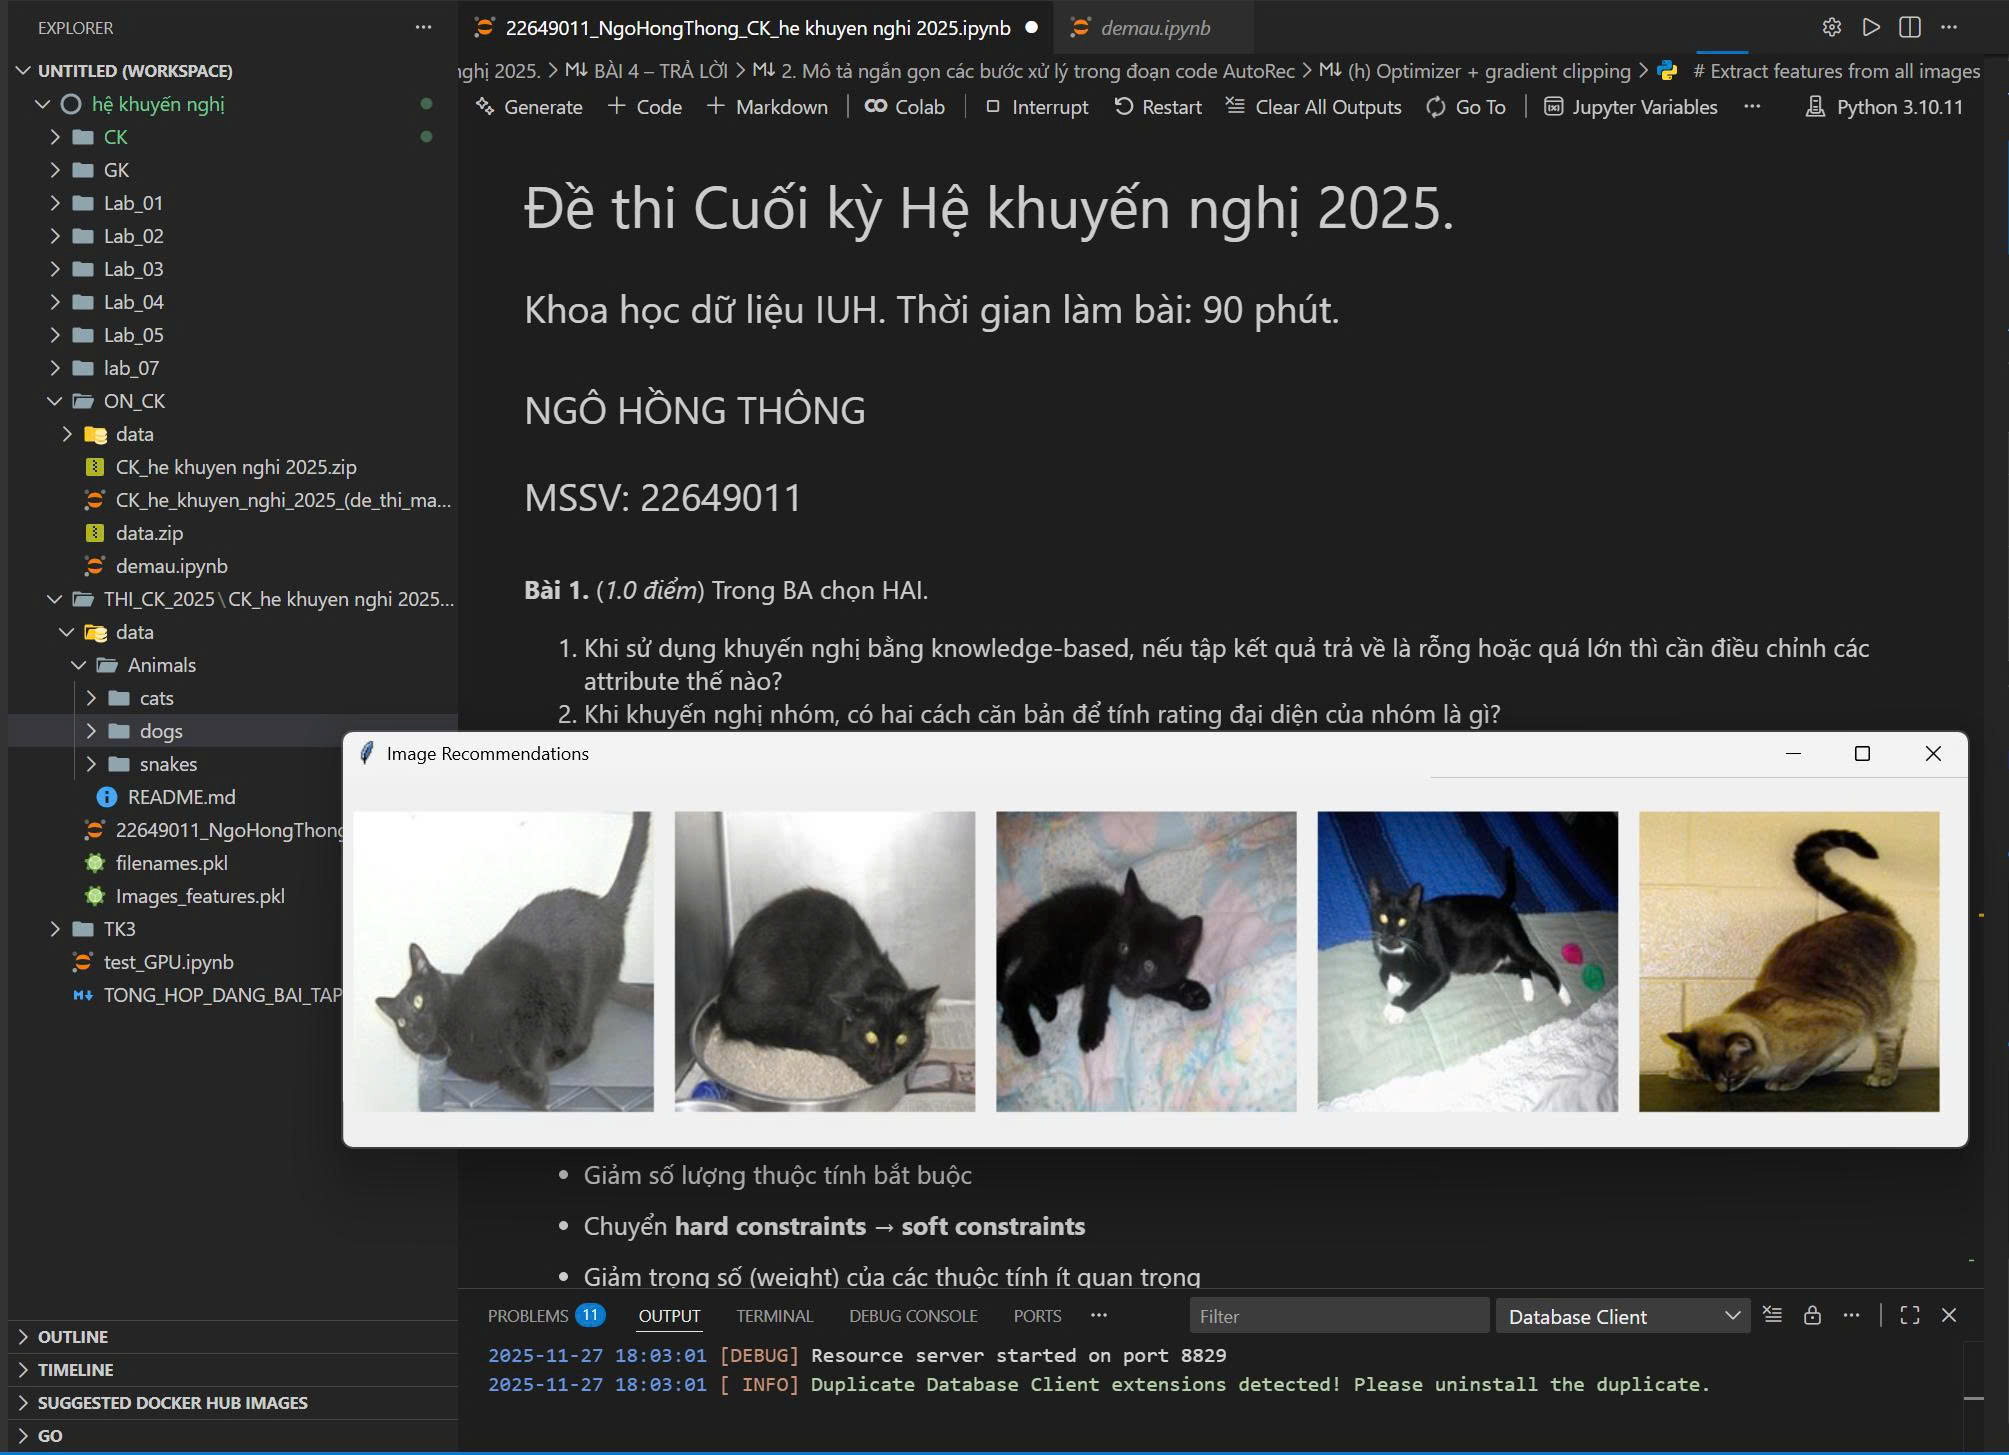

#### **1. Nhận xét về độ hiệu quả của hệ thống**

Sau khi chạy thử nghiệm với dataset Animals (cats, dogs, etc.):

**Ưu điểm:**
- Hệ thống khuyến nghị đúng các ảnh cùng loài động vật
- ResNet50 pre-trained trích xuất được đặc trưng visual tốt
- Khoảng cách Euclidean cho kết quả tương đối chính xác
- Tốc độ inference nhanh sau khi đã extract features

**Hạn chế:**
- Đôi khi khuyến nghị ảnh cùng loài nhưng khác tư thế/góc độ nhiều
- Chưa phân biệt được ngữ cảnh (indoor/outdoor)
- Không xử lý được ảnh có nhiều đối tượng
- Cold-start problem: cần extract feature cho mỗi ảnh mới

#### **2. Đề xuất cải tiến**

##### **(a) Sử dụng Fine-tuned Model**
- **Bước bổ sung:** Sau bước "Load and Prepare the Model"
- Fine-tune ResNet50 trên dataset Animals thay vì dùng ImageNet weights
- Thêm các layer Dense + Dropout trước output
- Train với task classification để model học đặc trưng domain-specific

##### **(b) Hybrid Approach: Visual + Metadata**
- **Bước bổ sung:** Sau bước "Feature Extraction"
- Kết hợp visual features với metadata (tags, category, color histogram)
- Concatenate features trước khi fit KNN
- Tăng trọng số cho metadata khi visual features không rõ ràng

##### **(c) Ensemble Multiple Models**
- **Bước bổ sung:** Trong bước "Extract features from all images"
- Dùng nhiều backbone: ResNet50 + EfficientNet + Vision Transformer
- Average/concat features từ nhiều model
- Voting mechanism cho final recommendations

##### **(d) Add Content-based Filtering**
- **Bước bổ sung:** Trước bước "Initialize Nearest Neighbors Model"
- Tạo user profile dựa trên lịch sử tương tác
- Weight recommendations theo preferences của user
- Personalized recommendations thay vì chỉ dựa similarity

##### **(e) Implement FAISS for Large Scale**
- **Bước bổ sung:** Thay thế bước "Initialize Nearest Neighbors Model"
- Dùng FAISS (Facebook AI Similarity Search) thay vì scikit-learn KNN
- Hỗ trợ millions of images với tốc độ cao
- Approximate nearest neighbors cho real-time inference

In [21]:
print("ĐÃ XONG THẦY ƠI")

ĐÃ XONG THẦY ƠI
